# 

# Amazon

# 

In [76]:
df = pd.read_csv('amazon_scraping.csv')

print(f"\nTotal Number of products: {len(df)}\n\n")

print(df+"\n")


Total Number of products: 3691


                                           Product Name     Price  \
0     Samsung Galaxy A35 5G (Awesome Navy, 8GB RAM, ...  30,999\n   
1     itel A50|6.6" HD+ Display with Dynamic Bar| 3G...   5,999\n   
2                                       (Refurbished)\n   7,999\n   
3     Redmi 13C 5G (Startrail Green, 4GB RAM, 128GB ...   9,199\n   
4     iQOO Z9 Lite 5G (Aqua Flow, 6GB RAM, 128GB Sto...  11,499\n   
...                                                 ...       ...   
3686  CALANDIS® USB Watch Charger Charging Stand Cha...   1,970\n   
3687  CALANDIS® Silicone Sleeve Pouch Holder W/Elast...     460\n   
3688                                    (Refurbished)\n   7,999\n   
3689  ATORSE® Micro USB to USB-C Type C Charging Dat...     469\n   
3690                                    (Refurbished)\n  18,950\n   

                                                 Rating No. of Ratings  \
0                                  3.7 out of 5 stars\n        

In [77]:
df = pd.read_csv('amazon_scraping.csv')

ddf = df[['Price', 'Rating', 'No. of Ratings', 'Discount']].drop_duplicates()

print(f"\nTotal Number of Unique products without color variations: {len(ddf)}\n\n")

print(ddf)


Total Number of Unique products without color variations: 2021


       Price                                             Rating  \
0     30,999                                 3.7 out of 5 stars   
1      5,999                                 3.8 out of 5 stars   
2      7,999                                                NaN   
3      9,199                                 4.0 out of 5 stars   
4     11,499                                 4.0 out of 5 stars   
...      ...                                                ...   
3686   1,970  The seller rating is 3.3 out of 5 stars and ha...   
3687     460  The seller rating is 3.3 out of 5 stars and ha...   
3688   7,999                                 1.5 out of 5 stars   
3689     469  The seller rating is 3.5 out of 5 stars and ha...   
3690  18,950                                 3.1 out of 5 stars   

     No. of Ratings   Discount  
0               268   (9% off)  
1                21   (8% off)  
2               NaN  (43% off)

In [16]:
df = pd.read_csv('amazon_scraping.csv')


df['Price'] = pd.to_numeric(df['Price'].astype(str).str.replace(',', ''), errors='coerce')
max_price_row = df.loc[df['Price'].idxmax()]
highest_price = max_price_row['Price']
highest_product_name = max_price_row['Product Name']
print(f"\nProduct with the highest price: {highest_product_name} (Price: ₹{highest_price}) \n")


df['Price'] = pd.to_numeric(df['Price'].astype(str).str.replace(',', ''), errors='coerce')
min_price_row = df.loc[df['Price'].idxmin()]
lowest_price = min_price_row['Price']
lowest_product_name = min_price_row['Product Name']
print(f"Product with the lowest price: {lowest_product_name} (Price: ₹{lowest_price})\n")


df['Rating'] = df['Rating'].str.extract(r'(\d+\.\d+)').astype(float)
average_rating = df['Rating'].mean()
print(f"The average rating is: {average_rating:.2f}\n")


total_products = df.shape[0]
count_high_rating = df[df['Rating'] > 4].shape[0]
percentage_high_rating = (count_high_rating / total_products) * 100 if total_products > 0 else 0
print(f"Percentage of products with a rating greater than 4: {percentage_high_rating:.2f}%\n")


count_low_rating = df[df['Rating'] < 3].shape[0]
percentage_low_rating = (count_low_rating / total_products) * 100 if total_products > 0 else 0
print(f"Percentage of products with a rating lesser than 3: {percentage_low_rating:.2f}%\n")


df['Discount'] = df['Discount'].str.extract(r'(\d+)').astype(float)
average_discount = df['Discount'].mean()
print(f"The average discount is: {average_discount:.2f}%\n")


count_low_price = df[df['Price'] < 1000].shape[0]

print(f"Number of products priced less than 1000: {count_low_price}\n")



Product with the lowest price: Samsung Galaxy Z Fold6 5G AI Smartphone (Silver Shadow, 12GB RAM, 1TB ...... (Price: ₹200998.0) 

Product with the lowest price: SSD Test Phone Test Phone SSD A3 Test Phone SSD A3 (Black) (Price: ₹10.0)

The average rating is: 3.68

Percentage of products with a rating greater than 4: 22.79%

Percentage of products with a rating lesser than 3: 11.14%

The average discount is: 28.45%

Number of products priced less than 1000: 273



In [17]:
import pandas as pd

df = pd.read_csv('amazon_scraping.csv')

df['Base_Name'] = df['Product Name'].str.split('(').str[0].str.strip()

df['Rating'] = df['Rating'].str.extract(r'(\d+\.\d+)').astype(float)

df['No. of Ratings'] = pd.to_numeric(df['No. of Ratings'], errors='coerce')

df = df.dropna(subset=['Rating', 'No. of Ratings'])

df = df[df['No. of Ratings'] > 50]

unique_high_rated = df.loc[df.groupby('Base_Name')['Rating'].idxmax()]

top_50_high_rated = unique_high_rated.sort_values(by='Rating', ascending=False).head(50)

filtered_top_50 = top_50_high_rated[~top_50_high_rated['Product Name'].str.startswith('(')]

print(filtered_top_50[['Product Name', 'Rating', 'No. of Ratings']].astype({'No. of Ratings': 'int'}))

                                           Product Name  Rating  \
44    realme NARZO 70 Turbo 5G (Turbo Yellow,6GB RAM...     4.9   
456                       Apple iPhone 15 Plus (128 GB)     4.6   
1620                         Apple iPhone 14 Pro (1 TB)     4.6   
1093  Samsung Galaxy Z Flip6 5G AI Smartphone (Blue,...     4.5   
780   Samsung Galaxy Z Fold6 5G AI Smartphone (Silve...     4.5   
52    iQOO Z9s Pro 5G (Luxe Marble, 8GB RAM, 128GB S...     4.5   
2807  Huawei P30 Pro (Breathing Crystal, 8GB RAM, 25...     4.5   
399   OnePlus 12 (Flowy Emerald, 16GB RAM, 512GB Sto...     4.5   
1047  SAMSUNG Galaxy S23 Ultra 5G (12GB Ram, 512GB S...     4.5   
1030          HONOR 200 Pro 5G (Ocean Cyan, 12GB+512GB)     4.4   
15     iQOO Z9s 5G (Onyx Green, 8GB RAM, 128GB Storage)     4.4   
673                    Apple iPhone 15 Pro Max (256 GB)     4.4   
2502  CloudValley for Galaxy S23 Ultra Case with Sli...     4.4   
1208  Oneplus Open (Apex Edition,16Gb Ram, 1Tb Storage)     4.

In [18]:
import pandas as pd

df = pd.read_csv('amazon_scraping.csv')

df['Base_Name'] = df['Product Name'].str.split('(').str[0].str.strip()
df['Rating'] = df['Rating'].str.extract(r'(\d+\.\d+)').astype(float)

df['No. of Ratings'] = pd.to_numeric(df['No. of Ratings'].str.replace(',', ''), errors='coerce')

df = df.dropna(subset=['Rating', 'No. of Ratings'])
df = df[df['No. of Ratings'] > 50]

unique_most_rated = df.loc[df.groupby('Base_Name')['No. of Ratings'].idxmax()]
top_50_most_rated = unique_most_rated.sort_values(by='No. of Ratings', ascending=False).head(50)

filtered_top_50_most_rated = top_50_most_rated[~top_50_most_rated['Product Name'].str.startswith('(')]

top_50_most_rated['No. of Ratings'] = top_50_most_rated['No. of Ratings'].astype(int)

print(filtered_top_50_most_rated[['Product Name','No. of Ratings']].astype({'No. of Ratings': 'int'}))


                                           Product Name  No. of Ratings
1258  Samsung Galaxy M30s (Opal Black, 6GB RAM, 128G...          248881
735   Samsung Galaxy M21 (Midnight Blue, 4GB RAM, 64...          239505
72    Nokia All-New 105 Dual Sim Keypad Phone with B...          145831
10    Nokia All-New 105 Single Sim Keypad Phone with...          145831
1054  Samsung Galaxy M30 (Metallic Blue, 3GB RAM, Su...          110356
600   Redmi Note 10S (Deep Sea Blue, 6GB RAM, 64GB S...           88663
2203                            Apple iPhone 11 (128GB)           73695
919   Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Stor...           60461
244   OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...           52424
55    OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 8GB...           50175
995   realme narzo 50A (Oxygen Green , 4GB RAM + 64 ...           46172
1022  OPPO A74 5G (Fluid Black, 6GB RAM, 128GB Storage)           39272
744   Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...         

# 

# Flipkart

# 

In [3]:
import pandas as pd

df = pd.read_csv('flipkart_scraping_final.csv')

print(f"\nTotal Number of products: {len(df)}\n\n")

print(df)


Total Number of products: 984


                                 Product Name    Price  Rating  \
0         vivo T3 Ultra (Frost Green, 128 GB)  ₹31,999     NaN   
1       Motorola G85 5G (Cobalt Blue, 128 GB)  ₹17,999     4.4   
2     vivo T3 Lite 5G (Vibrant Green, 128 GB)  ₹11,499     4.3   
3    vivo T3 Lite 5G (Majestic Black, 128 GB)  ₹11,499     4.3   
4     vivo T3 Lite 5G (Vibrant Green, 128 GB)  ₹10,499     4.4   
..                                        ...      ...     ...   
979              Honor 200 5G (Black, 256 GB)  ₹31,999     4.2   
980        vivo X100 (Asteroid Black, 512 GB)  ₹69,999     4.6   
981         vivo X100 (Stargaze Blue, 512 GB)  ₹69,999     4.6   
982       realme C67 5G (Dark Purple, 128 GB)  ₹13,999     4.4   
983       realme C67 5G (Sunny Oasis, 128 GB)  ₹13,999     4.4   

                     No. of Ratings Discount  
0                               NaN  11% off  
1    30,800 Ratings & 1,669 Reviews  14% off  
2      20,178 Ratings & 708 Revie

In [20]:
df = pd.read_csv('flipkart_scraping_final.csv')

dff = df[['Price', 'Rating', 'No. of Ratings', 'Discount']].drop_duplicates()

print(f"\nTotal Number of Unique products without color variations: {len(dff)}\n\n")

print(dff)


Total Number of Unique products without color variations: 544


       Price  Rating                     No. of Ratings     Discount
0    ₹31,999     NaN                                NaN      11% off
1    ₹17,999     4.4     30,800 Ratings & 1,669 Reviews      14% off
2    ₹11,499     4.3       20,178 Ratings & 708 Reviews      25% off
4    ₹10,499     4.4       15,860 Ratings & 513 Reviews      27% off
6    ₹15,999     4.1             32 Ratings & 3 Reviews      20% off
..       ...     ...                                ...          ...
975  ₹10,960     4.3        2,858 Ratings & 158 Reviews      15% off
977  ₹12,999     4.4  1,32,027 Ratings & 13,984 Reviews  No discount
979  ₹31,999     4.2             23 Ratings & 2 Reviews      20% off
980  ₹69,999     4.6           327 Ratings & 63 Reviews       6% off
982  ₹13,999     4.4        7,382 Ratings & 507 Reviews      17% off

[544 rows x 4 columns]


In [23]:
df = pd.read_csv('flipkart_scraping_final.csv')


df['Price'] = pd.to_numeric(df['Price'].astype(str).str.replace('₹', '').str.replace(',', ''), errors='coerce')
max_price_row = df.loc[df['Price'].idxmax()]
highest_price = max_price_row['Price']
highest_product_name = max_price_row['Product Name']
print(f"\nProduct with the lowest price: {highest_product_name} (Price: ₹{highest_price}) \n")


df['Price'] = pd.to_numeric(df['Price'].astype(str).str.replace(',', ''), errors='coerce')
min_price_row = df.loc[df['Price'].idxmin()]
lowest_price = min_price_row['Price']
lowest_product_name = min_price_row['Product Name']
print(f"Product with the lowest price: {lowest_product_name} (Price: ₹{lowest_price})\n")


average_rating = df['Rating'].mean()
print(f"The average rating is: {average_rating:.2f}\n")


total_products = df.shape[0]
count_high_rating = df[df['Rating'] > 4].shape[0]
percentage_high_rating = (count_high_rating / total_products) * 100 if total_products > 0 else 0
print(f"Percentage of products with a rating greater than 4: {percentage_high_rating:.2f}%\n")


count_low_rating = df[df['Rating'] < 3].shape[0]
percentage_low_rating = (count_low_rating / total_products) * 100 if total_products > 0 else 0
print(f"Percentage of products with a rating lesser than 3: {percentage_low_rating:.2f}%\n")


df['Discount'] = df['Discount'].str.extract(r'(\d+)').astype(float)
average_discount = df['Discount'].mean()
print(f"The average discount is: {average_discount:.2f}%\n")


count_low_price = df[df['Price'] < 1000].shape[0]

print(f"Number of products priced less than 1000: {count_low_price}\n")



Product with the lowest price: Google Pixel 9 Pro XL (Obsidian, 512 GB) (Price: ₹139999) 

Product with the lowest price: itel A23s (Morandi Green, 32 GB) (Price: ₹4600)

The average rating is: 4.30

Percentage of products with a rating greater than 4: 91.16%

Percentage of products with a rating lesser than 3: 0.00%

The average discount is: 20.64%

Number of products priced less than 1000: 0



In [6]:
import pandas as pd

df = pd.read_csv('flipkart_scraping_final.csv')

df['Base_Name'] = df['Product Name'].str.split('(').str[0].str.strip()

df = df.dropna(subset=['Rating', 'No. of Ratings'])

unique_high_rated = df.loc[df.groupby('Base_Name')['Rating'].idxmax()]

top_50_high_rated = unique_high_rated.sort_values(by='Rating', ascending=False).head(50)

filtered_top_50 = top_50_high_rated[~top_50_high_rated['Product Name'].str.startswith('(')]

print(filtered_top_50[['Product Name', 'Rating', 'No. of Ratings']])

                                          Product Name  Rating  \
708                 vivo Y28s 5G (Vintage Red, 128 GB)     5.0   
328                 Google Pixel 9 (Porcelain, 256 GB)     4.7   
172                 Apple iPhone 13 (Midnight, 128 GB)     4.6   
368                      Apple iPhone 14 (Red, 512 GB)     4.6   
47                      Apple iPhone 15 (Blue, 128 GB)     4.6   
133            Apple iPhone 14 Plus (Midnight, 128 GB)     4.6   
400        Apple iPhone 15 Pro (Blue Titanium, 256 GB)     4.6   
953   Apple iPhone 15 Pro Max (Black Titanium, 256 GB)     4.6   
485           Google Pixel 9 Pro XL (Obsidian, 256 GB)     4.6   
37                 Apple iPhone 15 Plus (Blue, 128 GB)     4.6   
520                   IQOO Z9s 5G (Onyx Green, 128 GB)     4.6   
828                   IQOO Z9S 5G (Onyx Green, 256 GB)     4.6   
924                   OnePlus 12 (Silky Black, 512 GB)     4.6   
852             Motorola g45 5G (Viva Magenta, 128 GB)     4.6   
980       

In [11]:
import pandas as pd
import re

df = pd.read_csv('flipkart_scraping_final.csv')

# Extract base name by splitting before '('
df['Base_Name'] = df['Product Name'].str.split('(').str[0].str.strip()

def extract_ratings(rating_str):
    match = re.search(r'([\d,]+) Ratings', str(rating_str))
    if match:
        return int(match.group(1).replace(',', ''))
    return None

df['No. of Ratings'] = df['No. of Ratings'].apply(extract_ratings)

df = df.dropna(subset=['Rating', 'No. of Ratings'])

unique_most_rated = df.loc[df.groupby('Base_Name')['No. of Ratings'].idxmax()]

top_50_most_rated = unique_most_rated.sort_values(by='No. of Ratings', ascending=False).head(50)

filtered_top_50_most_rated = top_50_most_rated[~top_50_most_rated['Product Name'].str.startswith('(')]

print(filtered_top_50_most_rated[['Product Name', 'No. of Ratings']].astype({'No. of Ratings': 'int'}))


                                          Product Name  No. of Ratings
516                  vivo T2x 5G (Marine Blue, 128 GB)          435153
395           SAMSUNG Galaxy F41 (Fusion Black, 64 GB)          394641
549                       Redmi 7A (Matte Gold, 32 GB)          389782
368                      Apple iPhone 14 (Red, 512 GB)          302384
172                 Apple iPhone 13 (Midnight, 128 GB)          284249
239                 realme C11 2021 (Cool Grey, 32 GB)          238532
119                      Apple iPhone 12 (Blue, 64 GB)          211056
774                             Redmi 4A (Gold, 32 GB)          209629
750                 realme C35 (Glowing Green, 128 GB)          198467
950                     POCO M4 Pro (Cool Blue, 64 GB)          188293
209      OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB)          162311
712             Infinix HOT 30i (Mirror Black, 128 GB)          153724
718        SAMSUNG Galaxy S21 FE 5G (Graphite, 128 GB)          146482
81   S

# 

# Visualization

# 

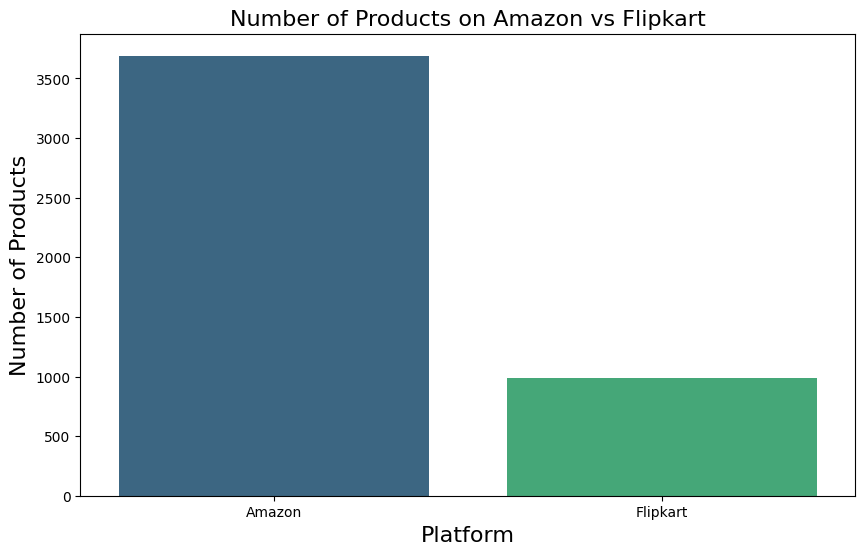

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_amazon = pd.read_csv('amazon_scraping.csv')
df_flipkart = pd.read_csv('flipkart_scraping_final.csv')

count_amazon = len(df_amazon)
count_flipkart = len(df_flipkart)

data = {
    'Platform': ['Amazon', 'Flipkart'],
    'Number of Products': [count_amazon, count_flipkart]
}
df_counts = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Number of Products', hue='Platform', data=df_counts, palette='viridis', legend=False)
plt.title('Number of Products on Amazon vs Flipkart', fontsize=16)
plt.ylabel('Number of Products', fontsize=16)
plt.xlabel('Platform', fontsize=16)
plt.show()

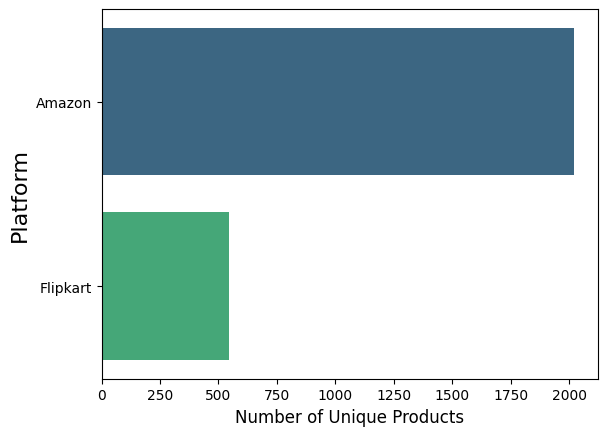

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_amazon = pd.read_csv('amazon_scraping.csv')
ddf_amazon = df_amazon[['Price', 'Rating', 'No. of Ratings', 'Discount']].drop_duplicates()

df_flipkart = pd.read_csv('flipkart_scraping_final.csv')
dff_flipkart = df_flipkart[['Price', 'Rating', 'No. of Ratings', 'Discount']].drop_duplicates()

df_comparison = pd.DataFrame({
    'Platform': ['Amazon', 'Flipkart'],
    'Unique Products': [len(ddf_amazon), len(dff_flipkart)]
})

sns.barplot(x='Unique Products', y='Platform', data=df_comparison, hue='Platform', palette='viridis')

plt.xlabel('Number of Unique Products', fontsize=12)
plt.ylabel('Platform', fontsize=16)

plt.show()


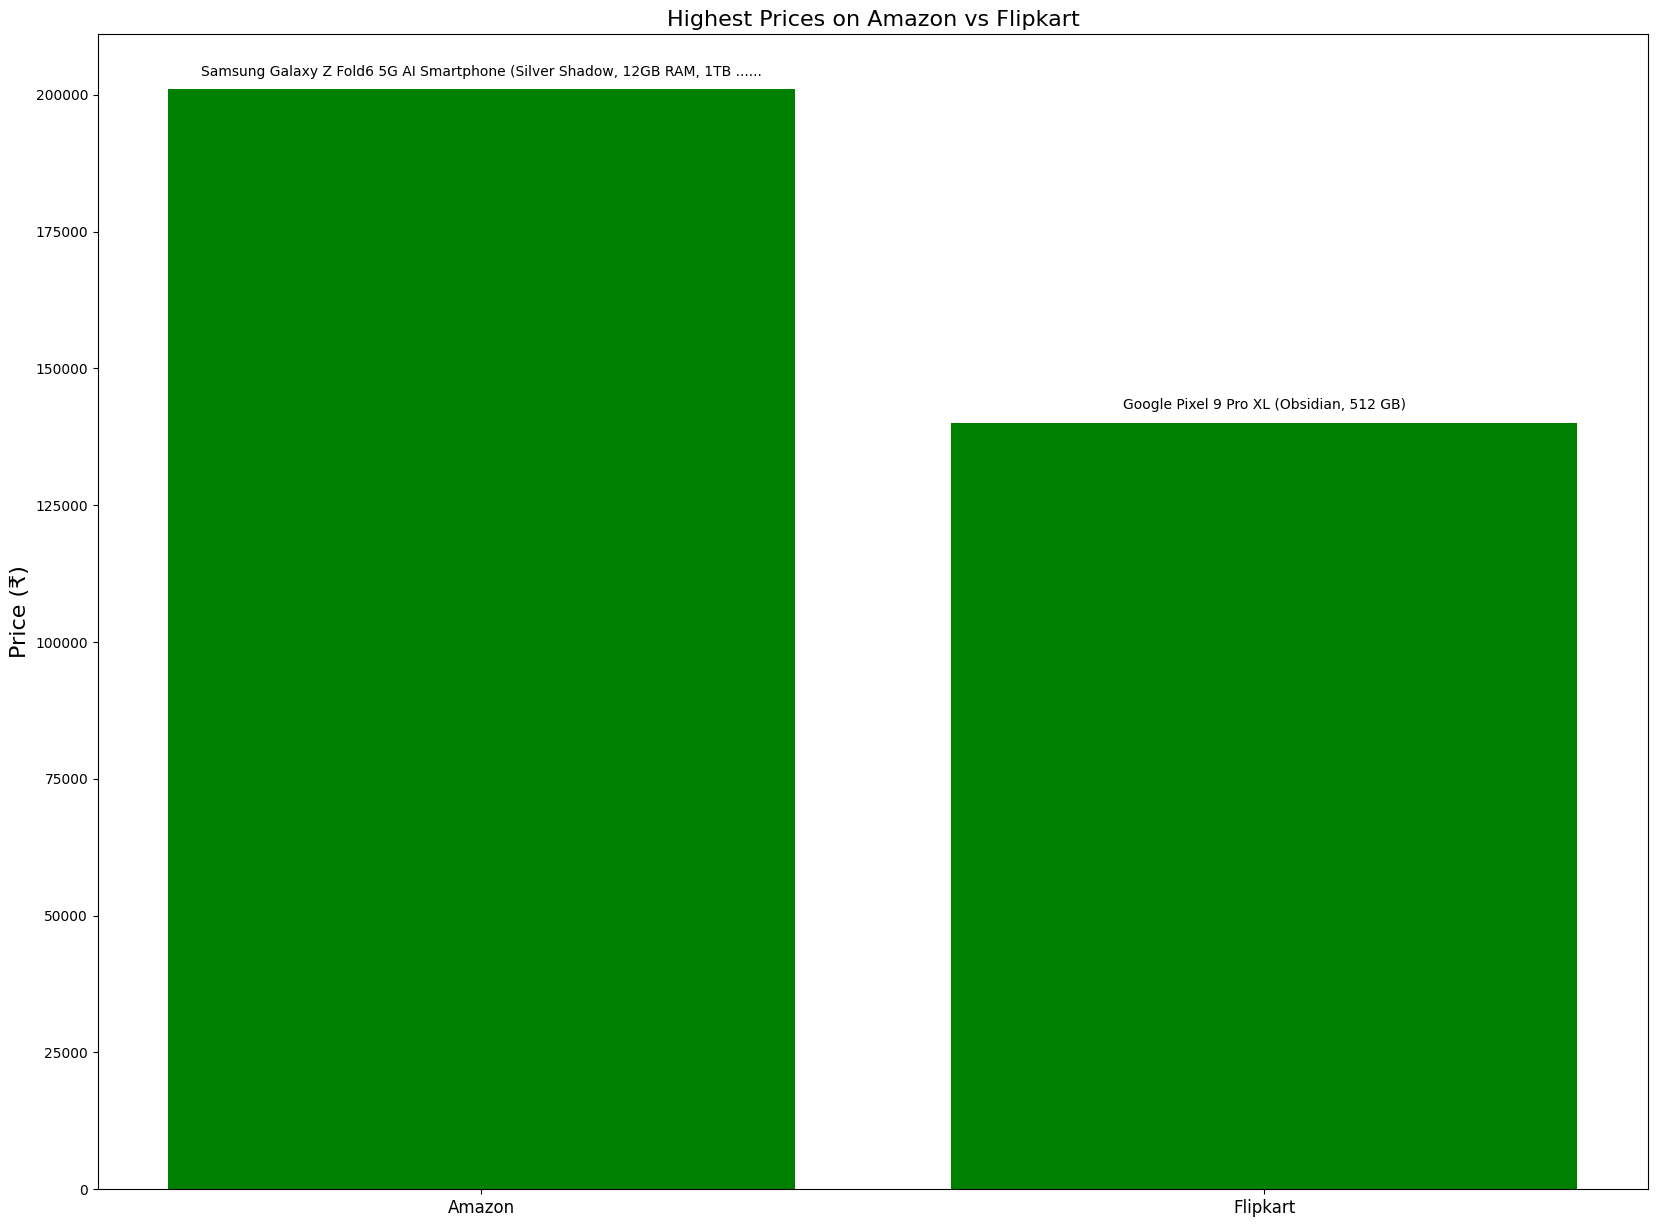

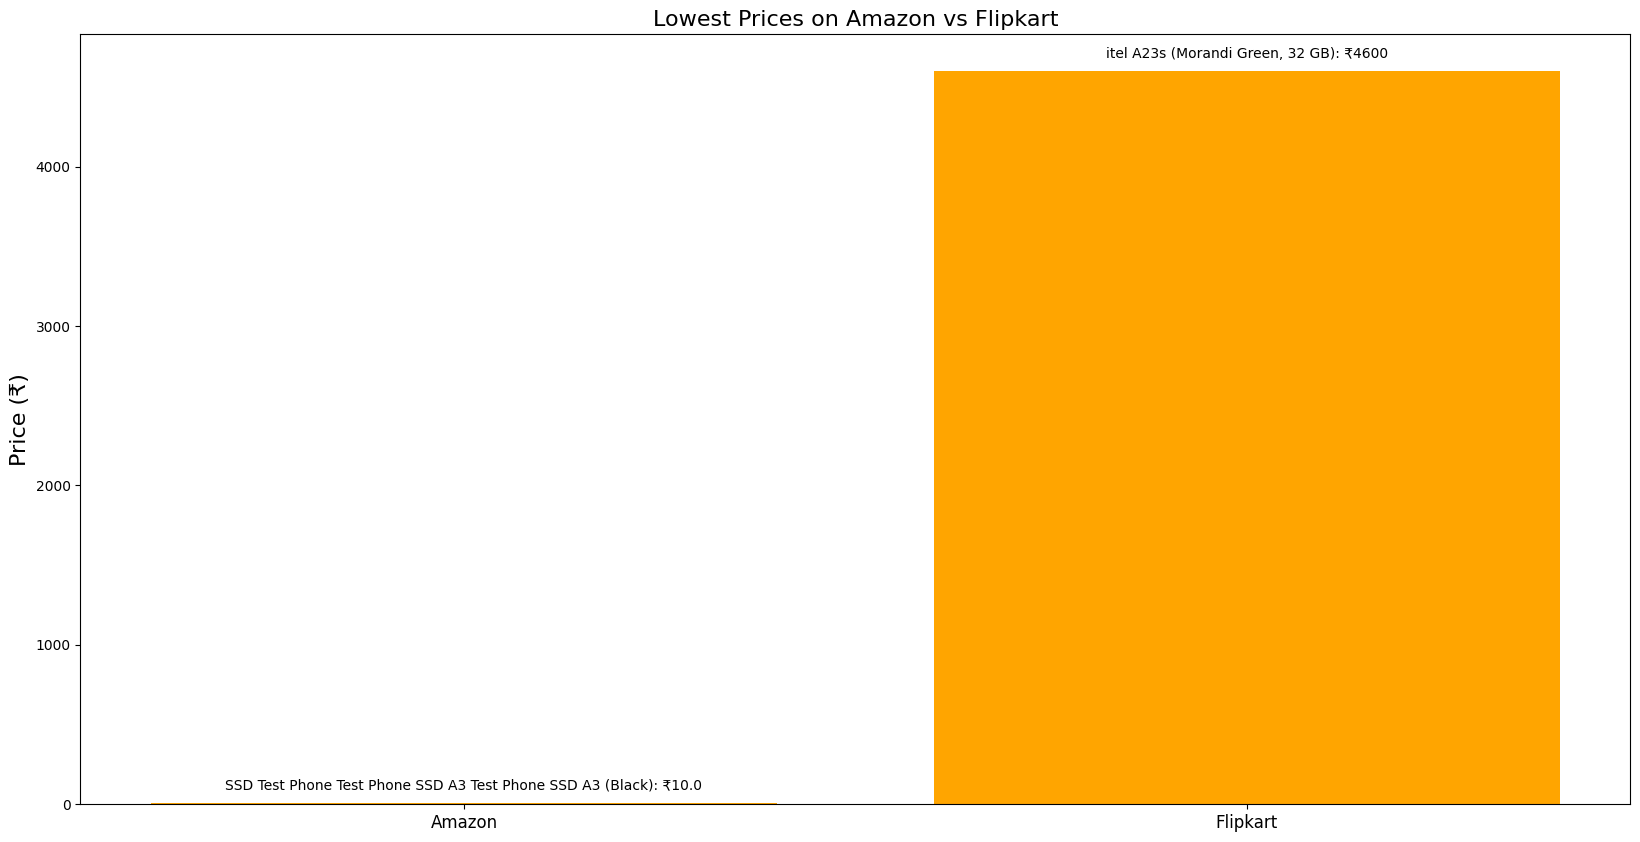

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

df_amazon = pd.read_csv('amazon_scraping.csv')
df_amazon['Price'] = pd.to_numeric(df_amazon['Price'].astype(str).str.replace(',', ''), errors='coerce')
highest_amazon = df_amazon.loc[df_amazon['Price'].idxmax()]
lowest_amazon = df_amazon.loc[df_amazon['Price'].idxmin()]

df_flipkart = pd.read_csv('flipkart_scraping_final.csv')
df_flipkart['Price'] = pd.to_numeric(df_flipkart['Price'].astype(str).str.replace('₹', '').str.replace(',', ''), errors='coerce')
highest_flipkart = df_flipkart.loc[df_flipkart['Price'].idxmax()]
lowest_flipkart = df_flipkart.loc[df_flipkart['Price'].idxmin()]

platforms = ['Amazon', 'Flipkart']
highest_prices = [highest_amazon['Price'], highest_flipkart['Price']]
lowest_prices = [lowest_amazon['Price'], lowest_flipkart['Price']]
highest_products = [highest_amazon['Product Name'], highest_flipkart['Product Name']]
lowest_products = [lowest_amazon['Product Name'], lowest_flipkart['Product Name']]

plt.figure(figsize=(20, 15))
plt.bar(platforms, highest_prices, color='green', align='center')
plt.title('Highest Prices on Amazon vs Flipkart', fontsize=16)
plt.ylabel('Price (₹)', fontsize=16)
plt.xticks(fontsize=12)

for i in range(len(platforms)):
    plt.text(i, highest_prices[i] + 2500, f"{highest_products[i]}", ha='center') 

plt.show()

plt.figure(figsize=(20, 10))
plt.bar(platforms, lowest_prices, color='orange', align='center')
plt.title('Lowest Prices on Amazon vs Flipkart', fontsize=16)
plt.ylabel('Price (₹)', fontsize=16)
plt.xticks(fontsize=12)

for i in range(len(platforms)):
    plt.text(i, lowest_prices[i] + 80, f"{lowest_products[i]}: ₹{lowest_prices[i]}", ha='center')

plt.show()


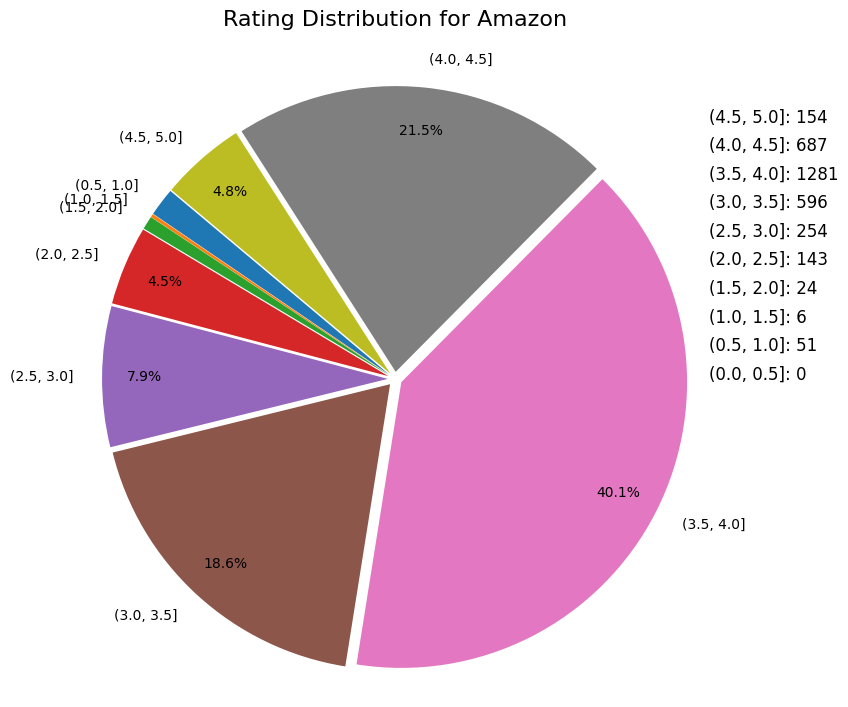

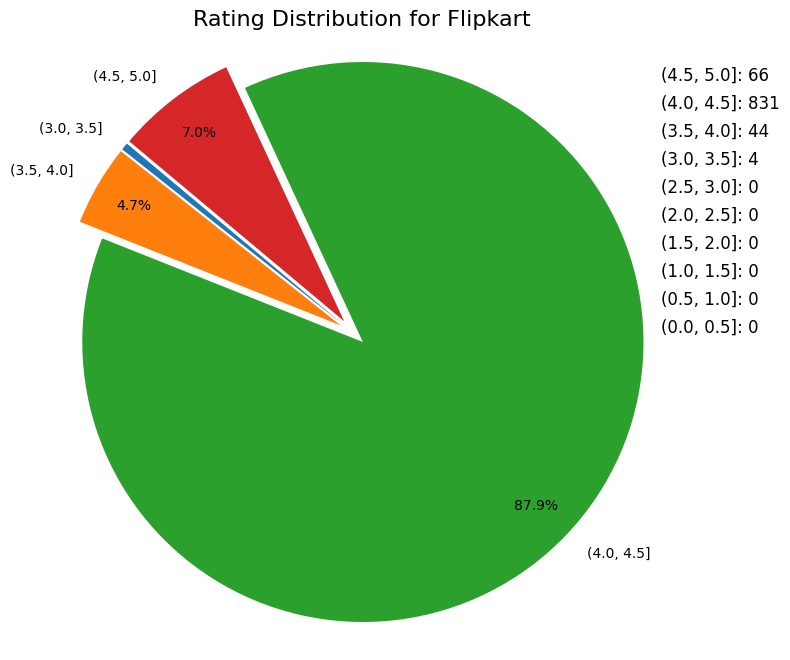

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

df_amazon = pd.read_csv('amazon_scraping.csv')
df_amazon['Rating'] = df_amazon['Rating'].str.extract(r'(\d+\.\d+)').astype(float)

rating_bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
df_amazon['Rating_Category'] = pd.cut(df_amazon['Rating'], bins=rating_bins)

rating_counts_amazon = df_amazon['Rating_Category'].value_counts().sort_index()

df_flipkart = pd.read_csv('flipkart_scraping_final.csv')

df_flipkart['Rating_Category'] = pd.cut(df_flipkart['Rating'], bins=rating_bins)
rating_counts_flipkart = df_flipkart['Rating_Category'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.pie(rating_counts_amazon[rating_counts_amazon > 0], 
        labels=rating_counts_amazon[rating_counts_amazon > 0].index, 
        autopct=lambda p: f'{p:.1f}%' if p >= 2 else '', 
        startangle=140, explode=[0.025] * rating_counts_amazon[rating_counts_amazon > 0].count(), 
        pctdistance=0.85)
plt.title('Rating Distribution for Amazon\n', fontsize=16)
plt.axis('equal')

plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.4, wspace=0.4)
for i, (count, label) in enumerate(zip(rating_counts_amazon, rating_counts_amazon.index)):
    plt.annotate(f'{label}: {count}', xy=(1.1, i * 0.1), fontsize=12)

plt.show()

plt.figure(figsize=(8, 8))
plt.pie(rating_counts_flipkart[rating_counts_flipkart > 0], 
        labels=rating_counts_flipkart[rating_counts_flipkart > 0].index, 
        autopct=lambda p: f'{p:.1f}%' if p >= 2 else '', 
        startangle=140, explode=[0.05] * rating_counts_flipkart[rating_counts_flipkart > 0].count(), 
        pctdistance=0.85)
plt.title('Rating Distribution for Flipkart', fontsize=16)
plt.axis('equal')

for i, (count, label) in enumerate(zip(rating_counts_flipkart, rating_counts_flipkart.index)):
    plt.annotate(f'{label}: {count}', xy=(1.1, i * 0.1), fontsize=12)

plt.show()


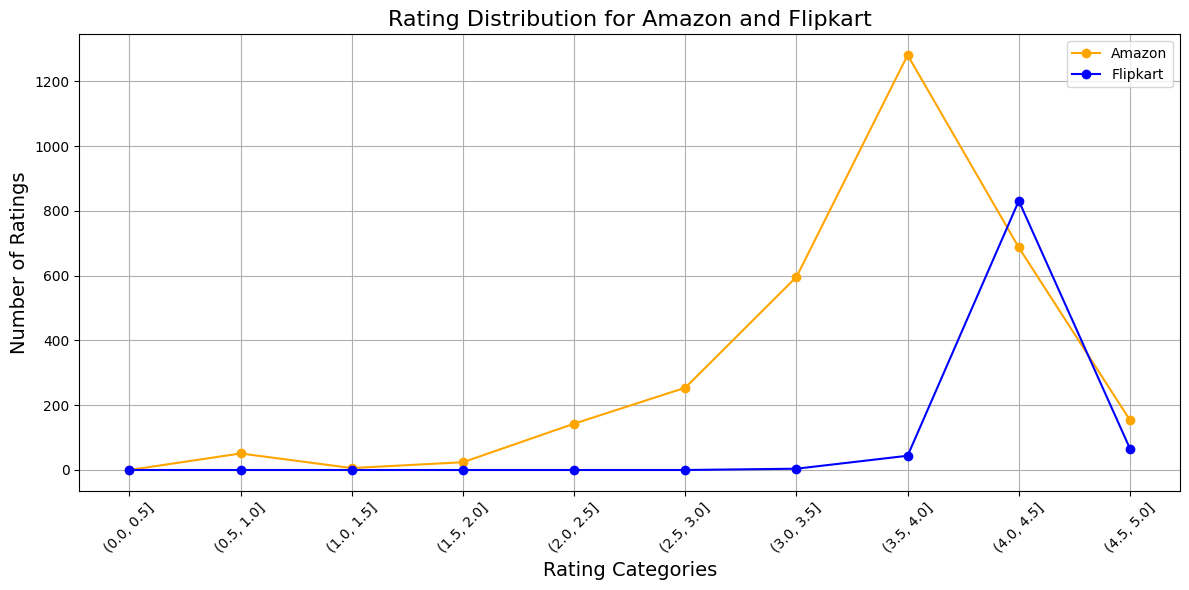

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

df_amazon = pd.read_csv('amazon_scraping.csv')
df_amazon['Rating'] = df_amazon['Rating'].str.extract(r'(\d+\.\d+)').astype(float)

rating_bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
df_amazon['Rating_Category'] = pd.cut(df_amazon['Rating'], bins=rating_bins)

rating_counts_amazon = df_amazon['Rating_Category'].value_counts().sort_index()

df_flipkart = pd.read_csv('flipkart_scraping_final.csv')
df_flipkart['Rating_Category'] = pd.cut(df_flipkart['Rating'], bins=rating_bins)
rating_counts_flipkart = df_flipkart['Rating_Category'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(rating_counts_amazon.index.astype(str), rating_counts_amazon, marker='o', label='Amazon', color='orange')

plt.plot(rating_counts_flipkart.index.astype(str), rating_counts_flipkart, marker='o', label='Flipkart', color='blue')

plt.title('Rating Distribution for Amazon and Flipkart', fontsize=16)
plt.xlabel('Rating Categories', fontsize=14)
plt.ylabel('Number of Ratings', fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


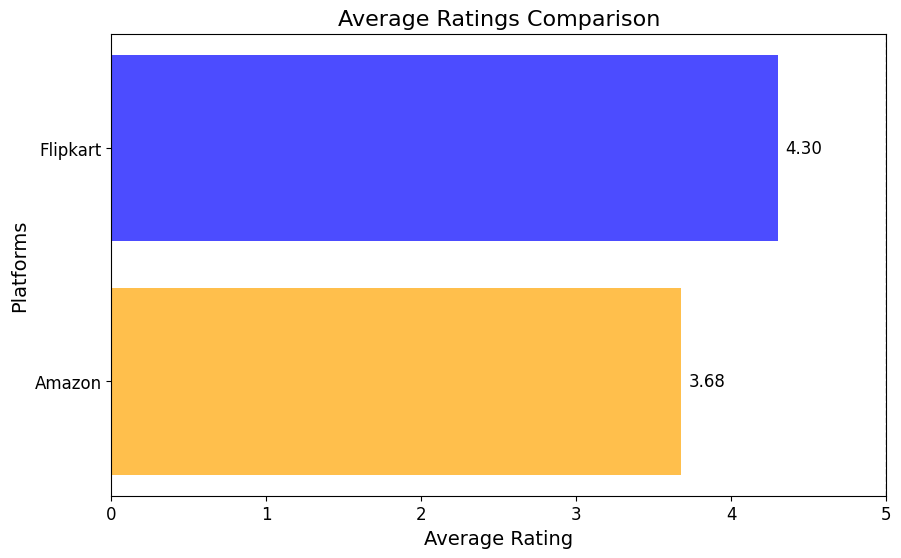

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

df_amazon = pd.read_csv('amazon_scraping.csv')
df_amazon['Rating'] = df_amazon['Rating'].str.extract(r'(\d+\.\d+)').astype(float)

df_flipkart = pd.read_csv('flipkart_scraping_final.csv')

average_rating_amazon = df_amazon['Rating'].mean()
average_rating_flipkart = df_flipkart['Rating'].mean()

labels = ['Amazon', 'Flipkart']
average_ratings = [average_rating_amazon, average_rating_flipkart]
max_rating = 5

plt.figure(figsize=(10, 6))
plt.barh(labels, average_ratings, color=['orange', 'blue'], alpha=0.7)
plt.xlim(0, max_rating)
plt.axvline(x=max_rating, color='gray', linestyle='--', linewidth=1)  # Draw a line at max rating
plt.title('Average Ratings Comparison', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Platforms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, avg_rating in enumerate(average_ratings):
    plt.text(avg_rating + 0.05, i, f'{avg_rating:.2f}', va='center', fontsize=12)

plt.show()


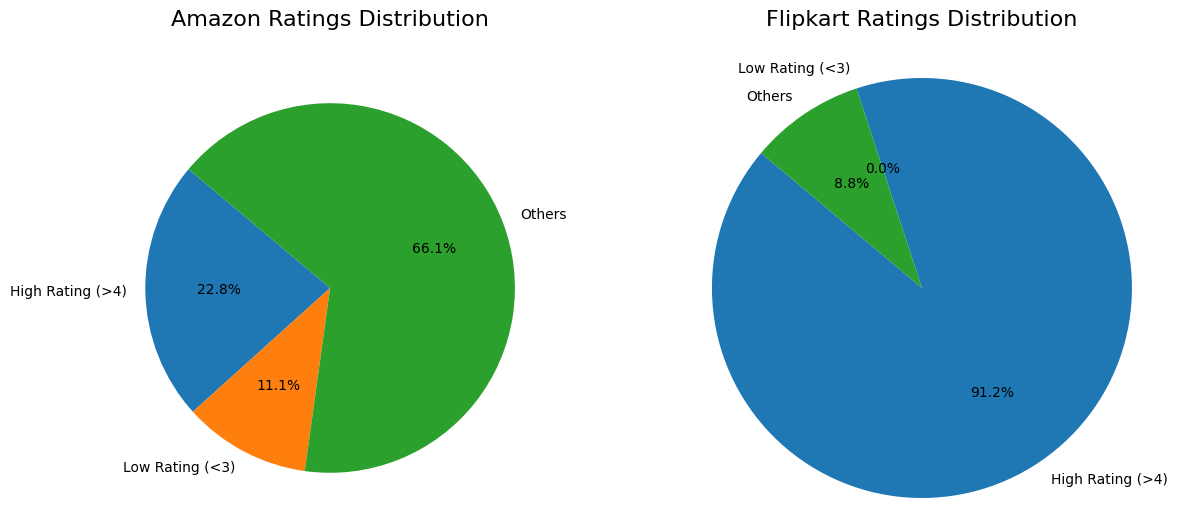

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

df_amazon = pd.read_csv('amazon_scraping.csv')
df_amazon['Rating'] = df_amazon['Rating'].str.extract(r'(\d+\.\d+)').astype(float)

df_flipkart = pd.read_csv('flipkart_scraping_final.csv')

total_products_amazon = df_amazon.shape[0]
count_high_rating_amazon = df_amazon[df_amazon['Rating'] > 4].shape[0]
percentage_high_rating_amazon = (count_high_rating_amazon / total_products_amazon) * 100 if total_products_amazon > 0 else 0

count_low_rating_amazon = df_amazon[df_amazon['Rating'] < 3].shape[0]
percentage_low_rating_amazon = (count_low_rating_amazon / total_products_amazon) * 100 if total_products_amazon > 0 else 0

total_products_flipkart = df_flipkart.shape[0]
count_high_rating_flipkart = df_flipkart[df_flipkart['Rating'] > 4].shape[0]
percentage_high_rating_flipkart = (count_high_rating_flipkart / total_products_flipkart) * 100 if total_products_flipkart > 0 else 0

count_low_rating_flipkart = df_flipkart[df_flipkart['Rating'] < 3].shape[0]
percentage_low_rating_flipkart = (count_low_rating_flipkart / total_products_flipkart) * 100 if total_products_flipkart > 0 else 0

labels = ['High Rating (>4)', 'Low Rating (<3)', 'Others']
sizes_amazon = [percentage_high_rating_amazon, percentage_low_rating_amazon, 100 - (percentage_high_rating_amazon + percentage_low_rating_amazon)]
sizes_flipkart = [percentage_high_rating_flipkart, percentage_low_rating_flipkart, 100 - (percentage_high_rating_flipkart + percentage_low_rating_flipkart)]

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].pie(sizes_amazon, labels=labels, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Amazon Ratings Distribution\n', fontsize=16)

axs[1].pie(sizes_flipkart, labels=labels, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Flipkart Ratings Distribution\n', fontsize=16)

plt.axis('equal')
plt.show()



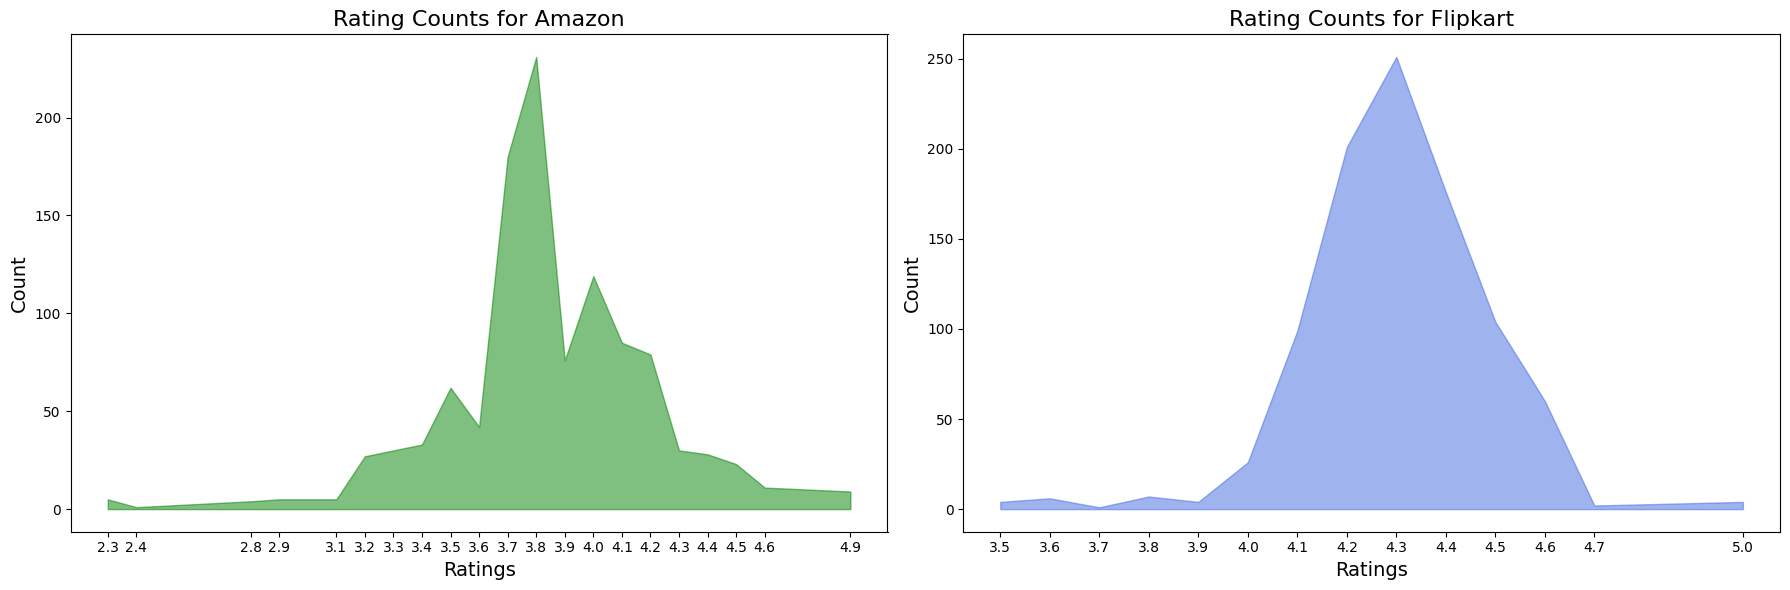

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

df_amazon = pd.read_csv('amazon_scraping.csv')
df_amazon['Rating'] = df_amazon['Rating'].str.extract(r'(\d+\.\d+)').astype(float)
df_amazon['No. of Ratings'] = pd.to_numeric(df_amazon['No. of Ratings'], errors='coerce')
df_amazon = df_amazon.dropna(subset=['Rating', 'No. of Ratings'])
df_amazon = df_amazon[df_amazon['No. of Ratings'] > 50]

rating_counts_amazon = df_amazon['Rating'].value_counts().sort_index()

df_flipkart = pd.read_csv('flipkart_scraping_final.csv')
df_flipkart = df_flipkart.dropna(subset=['Rating', 'No. of Ratings'])

rating_counts_flipkart = df_flipkart['Rating'].value_counts().sort_index()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.fill_between(rating_counts_amazon.index, rating_counts_amazon.values, color='green', alpha=0.5)
plt.title('Rating Counts for Amazon', fontsize=16)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rating_counts_amazon.index)

plt.subplot(1, 2, 2)
plt.fill_between(rating_counts_flipkart.index, rating_counts_flipkart.values, color='royalblue', alpha=0.5)
plt.title('Rating Counts for Flipkart', fontsize=16)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rating_counts_flipkart.index)

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd

# Load the Amazon and Flipkart datasets
df_amazon = pd.read_csv('amazon_scraping.csv', encoding='ISO-8859-1')
df_flipkart = pd.read_csv('flipkart_scraping_final.csv', encoding='ISO-8859-1')

# Cleaning and preprocessing the Amazon data
df_amazon['Rating'] = df_amazon['Rating'].str.extract(r'(\d+\.\d+)').astype(float)
df_amazon['No. of Ratings'] = pd.to_numeric(df_amazon['No. of Ratings'], errors='coerce')
df_amazon = df_amazon.dropna(subset=['Rating', 'No. of Ratings'])
df_amazon = df_amazon[df_amazon['No. of Ratings'] > 50]

# Cleaning and preprocessing the Flipkart data
df_flipkart = df_flipkart.dropna(subset=['Rating', 'No. of Ratings'])

# Define a function to categorize sentiment based on rating
def categorize_sentiment(rating):
    if rating >= 4.0:
        return 'Positive'
    elif rating >= 2.0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the sentiment categorization for both datasets
df_amazon['Sentiment'] = df_amazon['Rating'].apply(categorize_sentiment)
df_flipkart['Sentiment'] = df_flipkart['Rating'].apply(categorize_sentiment)

# Get sentiment distribution for Amazon and Flipkart
amazon_sentiment_counts = df_amazon['Sentiment'].value_counts()
flipkart_sentiment_counts = df_flipkart['Sentiment'].value_counts()

# Print the sentiment distribution
print("Amazon Sentiment Distribution:")
print(amazon_sentiment_counts)

print("\nFlipkart Sentiment Distribution:")
print(flipkart_sentiment_counts)


Amazon Sentiment Distribution:
Sentiment
Neutral     701
Positive    384
Name: count, dtype: int64

Flipkart Sentiment Distribution:
Sentiment
Positive    923
Neutral      22
Name: count, dtype: int64


In [2]:
pip install fuzzywuzzy[speedup]

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ACER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import fuzzywuzzy


In [6]:
print(df_amazon)

                                           Product Name    Price  Rating  \
0     Samsung Galaxy A35 5G (Awesome Navy, 8GB RAM, ...  30999.0     3.7   
4     iQOO Z9 Lite 5G (Aqua Flow, 6GB RAM, 128GB Sto...  11499.0     4.0   
6     iQOO Z9 Lite 5G (Mocha Brown, 6GB RAM, 128GB S...  11499.0     4.0   
8     iQOO Z9 Lite 5G (Aqua Flow, 4GB RAM, 128GB Sto...  10499.0     4.0   
9     iQOO Z9 Lite 5G (Mocha Brown, 4GB RAM, 128GB S...  10499.0     4.0   
...                                                 ...      ...     ...   
3651  YKCZL Compatible with iPhone 12 Pro Case 6.1 i...   3873.0     4.2   
3652  YKCZL Compatible with iPhone 11 Pro Case 5.8 i...   3637.0     4.2   
3655  ZARALA Super Frosted Shield Pro Back Silicone ...    250.0     4.0   
3661  Samsung Galaxy A35 5G (Awesome Navy, 8GB RAM, ...  33999.0     3.7   
3663  itel it5027 Keypad Mobile Phone with 2.4 inch ...   1099.0     3.8   

      No. of Ratings     Discount  \
0              268.0     (9% off)   
4            

In [9]:
print(df_flipkart)

Empty DataFrame
Columns: [Product Name, Price, Rating, No. of Ratings, Discount, Base Product Name, Matched Amazon Product, Simplified Product Name]
Index: []


In [10]:
df_flipkart = pd.read_csv('flipkart_scraping_final.csv', encoding='ISO-8859-1')

In [34]:
import os
print(os.getcwd())


C:\Users\ACER\Desktop\project


In [31]:
os.chdir('C:\\Users\\ACER\\Desktop\\project')


In [37]:
os.chdir('C:\\Users\\ACER\\Desktop\\project')

In [40]:
df_flipkart = pd.read_csv('flipkart_scraping_final.csv', encoding='ISO-8859-1')


In [49]:
def fuzzy_merge(df1, df2, key1, key2, threshold=90):
    matches = []
    for i, prod1 in enumerate(df1[key1]):
        for j, prod2 in enumerate(df2[key2]):
            score = fuzz.token_set_ratio(prod1, prod2)
            if score >= threshold:
                matches.append((i, j))
                print(f"Match found: {prod1} <-> {prod2} with score {score}")  # Debug print

    if matches:
        df1_matches = df1.iloc[[m[0] for m in matches]]
        df2_matches = df2.iloc[[m[1] for m in matches]]
        return pd.merge(df1_matches, df2_matches, left_index=True, right_index=True, suffixes=('_amazon', '_flipkart'))
    else:
        print("No matches found.")  # Debug print
        return pd.DataFrame()


In [51]:
import re
from fuzzywuzzy import fuzz
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Function to simplify product names by removing color, storage details, and extra spaces
def simplify_product_name(name):
    # Remove words like "128 GB", "256 GB", and any color or variants
    name = re.sub(r'\b(\d+ GB)\b', '', name)  # Remove storage info
    name = re.sub(r'\b(black|white|blue|green|red|gold|silver|plus|pro)\b', '', name, flags=re.IGNORECASE)  # Remove color/variant
    name = re.sub(r'[^\w\s]', '', name)  # Remove special characters
    name = re.sub(r'\s+', ' ', name)  # Remove extra spaces
    return name.strip().lower()

# Apply the function to both datasets to clean product names
df_amazon['Simplified Product Name'] = df_amazon['Product Name'].apply(simplify_product_name)
df_flipkart['Simplified Product Name'] = df_flipkart['Product Name'].apply(simplify_product_name)

# Debug: Check simplified names
print("Amazon Simplified Product Names:")
print(df_amazon[['Product Name', 'Simplified Product Name']].head(5))

print("\nFlipkart Simplified Product Names:")
print(df_flipkart[['Product Name', 'Simplified Product Name']].head(5))

# Function to fuzzy match the two datasets based on simplified product names
def fuzzy_merge(df1, df2, key1, key2, threshold=90):
    matches = []
    for i, prod1 in enumerate(df1[key1]):
        for j, prod2 in enumerate(df2[key2]):
            score = fuzz.token_set_ratio(prod1, prod2)
            if score >= threshold:
                matches.append((i, j))
                print(f"Match found: {prod1} <-> {prod2} with score {score}")  # Debug print

    if matches:
        df1_matches = df1.iloc[[m[0] for m in matches]]
        df2_matches = df2.iloc[[m[1] for m in matches]]
        return pd.merge(df1_matches, df2_matches, left_index=True, right_index=True, suffixes=('_amazon', '_flipkart'))
    else:
        print("No matches found.")  # Debug print
        return pd.DataFrame()

# Perform the fuzzy matching with a 90% similarity threshold
df_combined = fuzzy_merge(df_amazon, df_flipkart, 'Simplified Product Name', 'Simplified Product Name')

# Check if there are any matches
if df_combined.empty:
    print("No matching products found between Amazon and Flipkart.")
else:
    # Convert Price and Rating columns to numeric and handle errors
    df_combined['Rating_amazon'] = pd.to_numeric(df_combined['Rating_amazon'], errors='coerce')
    df_combined['Price_amazon'] = pd.to_numeric(df_combined['Price_amazon'], errors='coerce')
    df_combined['Rating_flipkart'] = pd.to_numeric(df_combined['Rating_flipkart'], errors='coerce')
    df_combined['Price_flipkart'] = pd.to_numeric(df_combined['Price_flipkart'], errors='coerce')

    # Fill NaN values with median values
    df_combined['Rating_amazon'] = df_combined['Rating_amazon'].fillna(df_combined['Rating_amazon'].median())
    df_combined['Price_amazon'] = df_combined['Price_amazon'].fillna(df_combined['Price_amazon'].median())
    df_combined['Rating_flipkart'] = df_combined['Rating_flipkart'].fillna(df_combined['Rating_flipkart'].median())
    df_combined['Price_flipkart'] = df_combined['Price_flipkart'].fillna(df_combined['Price_flipkart'].median())

    # Check for any columns that may still contain only NaN values
    for column in ['Rating_amazon', 'Price_amazon', 'Rating_flipkart', 'Price_flipkart']:
        if df_combined[column].isna().all():
            print(f"Warning: All values in {column} are NaN. Consider handling this case.")
            # Optionally, set it to a default value or drop it.
            df_combined[column] = 0  # Example default value

    # Ensure no NaN values exist before normalization
    if df_combined[['Rating_amazon', 'Price_amazon', 'Rating_flipkart', 'Price_flipkart']].isna().sum().any():
        raise ValueError("There are NaN values present that need to be handled before normalization.")

    # Normalize ratings and prices for both datasets using MinMaxScaler
    scaler = MinMaxScaler()
    df_combined[['Rating_amazon', 'Price_amazon']] = scaler.fit_transform(df_combined[['Rating_amazon', 'Price_amazon']])
    df_combined[['Rating_flipkart', 'Price_flipkart']] = scaler.fit_transform(df_combined[['Rating_flipkart', 'Price_flipkart']])

    # Calculate combined score (50% weight on rating, 50% weight on price)
    df_combined['Score_amazon'] = df_combined['Rating_amazon'] * 0.5 + (1 - df_combined['Price_amazon']) * 0.5
    df_combined['Score_flipkart'] = df_combined['Rating_flipkart'] * 0.5 + (1 - df_combined['Price_flipkart']) * 0.5

    # Recommend the better website for each product based on the combined score
    df_combined['Recommended Website'] = df_combined.apply(lambda row: 'Amazon' if row['Score_amazon'] > row['Score_flipkart'] else 'Flipkart', axis=1)

    # Show the product name, both scores, and the recommended website
    recommendations = df_combined[['Product Name_amazon', 'Score_amazon', 'Score_flipkart', 'Recommended Website']]

    # Print the scores and recommendations
    print("Product Comparison between Amazon and Flipkart:")
    print(recommendations)

    # Optional: save to a file for review
    recommendations.to_csv('product_recommendations.csv', index=False)


Amazon Simplified Product Names:
                                        Product Name  \
0  Samsung Galaxy A35 5G (Awesome Navy, 8GB RAM, ...   
4  iQOO Z9 Lite 5G (Aqua Flow, 6GB RAM, 128GB Sto...   
6  iQOO Z9 Lite 5G (Mocha Brown, 6GB RAM, 128GB S...   
8  iQOO Z9 Lite 5G (Aqua Flow, 4GB RAM, 128GB Sto...   
9  iQOO Z9 Lite 5G (Mocha Brown, 4GB RAM, 128GB S...   

                             Simplified Product Name  
0  samsung galaxy a35 5g awesome navy 8gb ram 128...  
4    iqoo z9 lite 5g aqua flow 6gb ram 128gb storage  
6  iqoo z9 lite 5g mocha brown 6gb ram 128gb storage  
8    iqoo z9 lite 5g aqua flow 4gb ram 128gb storage  
9  iqoo z9 lite 5g mocha brown 4gb ram 128gb storage  

Flipkart Simplified Product Names:
                               Product Name   Simplified Product Name
0       vivo T3 Ultra (Frost Green, 128 GB)       vivo t3 ultra frost
1     Motorola G85 5G (Cobalt Blue, 128 GB)    motorola g85 5g cobalt
2   vivo T3 Lite 5G (Vibrant Green, 128 GB)   vivo t3 

C:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [52]:
# Optional: save the full combined DataFrame to a CSV for further analysis
df_combined.to_csv('full_combined_data.csv', index=False)

# Save the recommendations to a separate CSV file
recommendations.to_csv('product_recommendations.csv', index=False)
